<a href="https://colab.research.google.com/github/shiling2007/Python-/blob/main/Copy_of_Part1_Encoder_Decode_keras_6_Save.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:

from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:100% !important; }</style>"))
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files
# files.download('/content/drive/MyDrive/Colab Notebooks/Lease Payment Formula.ipynb') 
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.5g" % x))
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 999)
pd.set_option("max_colwidth", 500)
# try:
#  device_name = os.environ['COLAB_TPU_ADDR']
#  TPU_ADDRESS = 'grpc://' + device_name
#  print('Found TPU at: {}'.format(TPU_ADDRESS))
# except KeyError:
#  print('TPU not found')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
#page 9,10

def data_gen(ntrj=3, nsample=25, seed=1):
  np.random.seed(seed)

  sample=[]
  for j in range(ntrj):
      x=4*np.random.rand(1)-2
      y=4*np.random.rand(1)-2
      mu=-0.1; lam=1;  
      t_space=0.1
      t=np.array(0.)
      data_sample=[[x,y]]
      for i in range(nsample):
        # print(i)
         
        y = y+ lam * (y - x**2) * t_space 
        x = x+ mu * x * t_space
        
        t=t+t_space
        # print(t)
        data_sample.append([x,y])
      sample.append(data_sample)
  return sample

n=400
train=np.array(data_gen(ntrj=n, nsample=25, seed=13)).flatten().reshape(n*(25+1),2)
n=200
valid=np.array(data_gen(ntrj=n, nsample=25, seed=103)).flatten().reshape(n*(25+1),2)
n=80
test=np.array(data_gen(ntrj=n, nsample=25, seed=1003)).flatten().reshape(n*(25+1),2)
df=pd.DataFrame(train,columns=['x','y'])


In [21]:
df

,x,y
0,1.110810,-1.049835
1,1.099702,-1.278208
2,1.088705,-1.526964
3,1.077817,-1.798188
4,1.067039,-2.094176
...,...,...
10395,0.090032,2.388239
10396,0.089131,2.626252
10397,0.088240,2.888083
10398,0.087358,3.176112


In [22]:
# x=0.538909	;y=-0.798880
# mu=-0.1; lam=1;  
# t_space=0.1
# y = y+ lam * (y - x**2) * t_space
# x = x+ mu * x * t_space
# print(x, y)

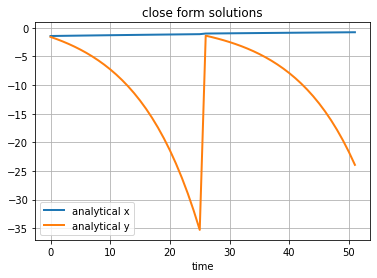

In [24]:
n=13
df2=df.iloc[52*n:52*(n+1),:]

t=[x for x in range(52)]
plt.figure()
plt.plot(t, df2.x, '-', linewidth=2, label='analytical x')
plt.plot(t, df2.y, '-', linewidth=2, label='analytical y')
# plt.plot(df1.t, df1.z, '-', linewidth=2, label='analytical z')

plt.title('close form solutions')
plt.xlabel('time')
plt.legend()
plt.grid()
plt.show()

In [25]:
train.shape

(10400, 2)

In [ ]:
# X_train=train.reshape(400,26,2)[:,:-1,:].reshape(400*25,2)
# Y_train=train.reshape(400,26,2)[:,1:,:].reshape(400*25,2)

In [26]:
X_train=train.reshape(400,26,2)[:,:-1,:].reshape(400*25,2)
Y_train_ko=train.reshape(400,26,2)[:,1:,:].reshape(400*25,2)
Y_train_ed=train.reshape(400,26,2)[:,:-1,:].reshape(400*25,2)
X_valid =valid.reshape(200,26,2)[:,:-1,:].reshape(200*25,2)
Y_valid_ko =valid.reshape(200,26,2)[:,1:,:].reshape(200*25,2)
Y_valid_ed=valid.reshape(200,26,2)[:,:-1,:].reshape(200*25,2)
X_test =test.reshape(80,26,2)[:,:-1,:].reshape(80*25,2)
Y_test_ko =test.reshape(80,26,2)[:,1:,:].reshape(80*25,2)
Y_test_ed=test.reshape(80,26,2)[:,:-1,:].reshape(80*25,2)

In [ ]:
##Keras model

In [28]:
X_train.shape,Y_train_ko.shape, Y_train_ed.shape, X_valid.shape,Y_valid_ko.shape, Y_valid_ed.shape, test.shape,Y_test_ko.shape, Y_test_ed.shape

((10000, 2),
 (10000, 2),
 (10000, 2),
 (5000, 2),
 (5000, 2),
 (5000, 2),
 (2080, 2),
 (2000, 2),
 (2000, 2))

In [29]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Model, Sequential
from keras.layers import Input, add
from keras.layers import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from numpy import linalg as LA

1000


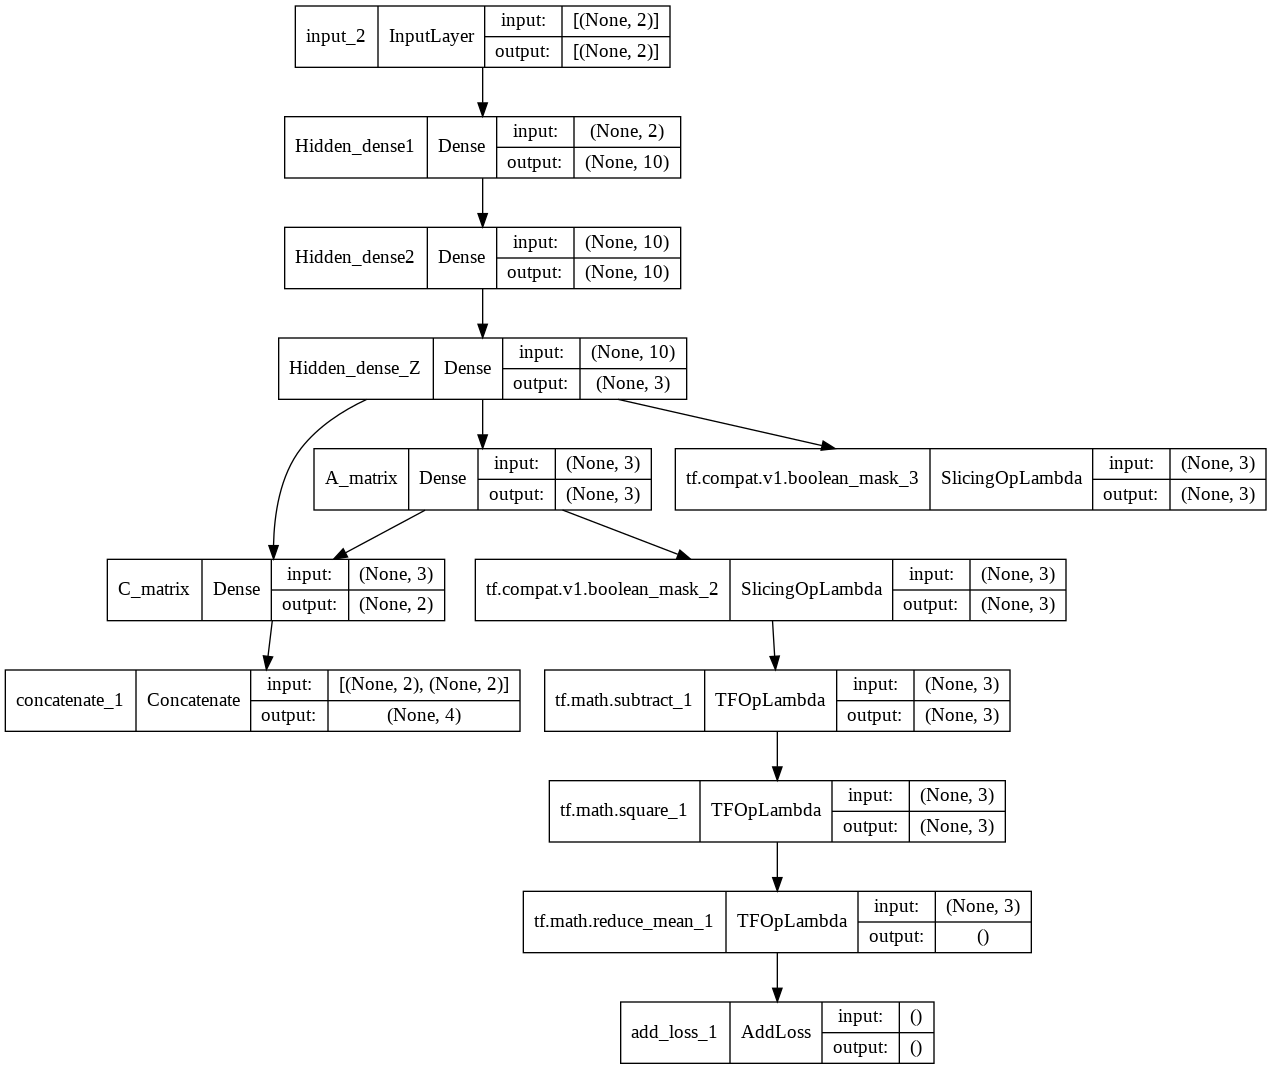

In [12]:
# Define encoder model.
#Define newwork structure
input_size = 2
output_size1 = 10
output_size2 = 10
output_size3 = 3
output_size4 = 3
output_size5 = 2

tf.random.set_seed(22340)

batch_size = 1000
print(batch_size)

original_inputs = tf.keras.Input(shape=(input_size,), )
Hidden_dense1  = Dense(output_size1, activation='linear', name="Hidden_dense1",  use_bias=False,)(original_inputs)
Hidden_dense2  = Dense(output_size2, activation='relu',   name="Hidden_dense2",  use_bias=True, )(Hidden_dense1)
Hidden_dense_Z = Dense(output_size3, activation='relu',   name="Hidden_dense_Z", use_bias=True, )(Hidden_dense2)
C_layer = Dense(output_size5, activation='linear', name="C_matrix", use_bias=False, trainable=True )
C1 = C_layer(Hidden_dense_Z)
model = tf.keras.Model(inputs=original_inputs, outputs=C1, name="encoder")

# Define decoder model.
A_layer        = Dense(output_size4, activation='linear', use_bias=False, name='A_matrix')(Hidden_dense_Z)
C2 = C_layer(A_layer)
merge_layer = keras.layers.concatenate([C1, C2])

# Define KO model
mask0 = ~tf.equal(tf.range(batch_size)  % 25, 0)
mask1 = ~tf.equal(tf.range(batch_size)  % 25, 24)

# KO_loss = tf.reduce_mean( tf.square(A_layer[:-1, :]-Hidden_dense_Z[1:,:]))

KO_loss = tf.reduce_mean( tf.square(tf.boolean_mask(A_layer, mask1)-tf.boolean_mask(Hidden_dense_Z, mask0)))

model = Model(original_inputs, merge_layer)
model.add_loss(KO_loss)

# concatenated = concatenate([C1, C2])

model.compile(optimizer="Adam", loss='mse')
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [13]:
# tf.random.set_seed(12340)
# tf.random.set_seed(22340)

YM=np.c_[Y_train_ed,Y_train_ko]
YM_valid=np.c_[Y_valid_ed,Y_valid_ko]
epochs = 1000
print(batch_size)
history = model.fit(X_train, YM , batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_valid, YM_valid), shuffle=False)
history = model.fit(X_train, YM , batch_size=batch_size, epochs=1, verbose=1, validation_data=(X_valid, YM_valid), shuffle=False)
# 1000
# Epoch 1/2
# 10/10 [==============================] - 1s 26ms/step - loss: 43.3727 - val_loss: 36.3752
# Epoch 2/2
# 10/10 [==============================] - 0s 6ms/step - loss: 42.3766 - val_loss: 36.3506
# 10/10 [==============================] - 0s 8ms/step - loss: 40.0332 - val_loss: 26.7410

1000
Epoch 1/1000
10/10 [==============================] - 1s 32ms/step - loss: 62.7529 - val_loss: 47.9635
Epoch 2/1000
10/10 [==============================] - 0s 6ms/step - loss: 51.5931 - val_loss: 41.3667
Epoch 3/1000
10/10 [==============================] - 0s 6ms/step - loss: 46.1149 - val_loss: 38.5033
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 43.9258 - val_loss: 37.3951
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 43.0026 - val_loss: 36.7295
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 42.3098 - val_loss: 36.1114
Epoch 7/1000
10/10 [==============================] - 0s 5ms/step - loss: 41.6463 - val_loss: 35.5418
Epoch 8/1000
10/10 [==============================] - 0s 6ms/step - loss: 41.0575 - val_loss: 35.0612
Epoch 9/1000
10/10 [==============================] - 0s 6ms/step - loss: 40.5391 - val_loss: 34.6197
Epoch 10/1000
10/10 [==============================] - 0s 7ms/step - loss: 4

In [14]:
history = model.fit(X_train, YM , batch_size=batch_size, epochs=1500, verbose=0, validation_data=(X_valid, YM_valid), shuffle=False)
history = model.fit(X_train, YM , batch_size=batch_size, epochs=1, verbose=1, validation_data=(X_valid, YM_valid), shuffle=False)

10/10 [==============================] - 0s 15ms/step - loss: 0.0026 - val_loss: 0.0024


In [16]:
mu=-0.1; lam=1;  
t_space=0.1
A=np.array([[1+mu*t_space,0,0],[0, 1+lam*t_space, -lam*t_space],[0,0,(1+mu*t_space)**2]])
print('A-matrix','\n', A , '\n')

eig_vals_of_A=LA.eigvals(A)
print('eigan values','\t', eig_vals_of_A, '\n')
C=model.get_weights()[-1]
print('C-matrix','\n', C , '\n')
A=model.get_weights()[-2]
print('A-matrix estimate','\n', A , '\n')
eig_vals_of_A=LA.eigvals(A)
print('eigan values estimate','\t', eig_vals_of_A, '\n')


A-matrix 
 [[0.99 0 0]
 [0 1.1 -0.1]
 [0 0 0.9801]] 

eigan values 	 [0.99 1.1 0.9801] 

C-matrix 
 [[0.97619 2.4187]
 [0.15382 -1.3494]
 [-1.8339 0.45449]] 

A-matrix estimate 
 [[1.0475 -0.069361 0.024614]
 [-0.0080869 1.0938 0.0043537]
 [0.054248 0.10341 1.0278]] 

eigan values estimate 	 [0.9903 1.0745 1.1043] 



In [17]:
ynew = model.predict(X_test)
YT=np.c_[Y_test_ed,Y_test_ko]
df_model=pd.DataFrame(np.c_[ynew,YT], columns=['x1_model','x2_model','x11_model','x22_model','x1_true','x2_true','x11_true','x22_true'])
df_model['err_x1']=df_model['x1_model']-df_model['x1_true']
df_model['err_x2']=df_model['x2_model']-df_model['x2_true']
df_model['err_x11']=df_model['x11_model']-df_model['x11_true']
df_model['err_x22']=df_model['x22_model']-df_model['x22_true']
df_model.describe()

,x1_model,x2_model,x11_model,x22_model,x1_true,x2_true,x11_true,x22_true,err_x1,err_x2,err_x11,err_x22
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.024760,-3.626061,0.024784,-4.063165,0.025359,-3.609441,0.025106,-4.074892,-0.000599,-0.016621,-0.000322,0.011727
std,1.021213,6.785093,1.011297,7.506823,1.022230,6.795806,1.012008,7.498101,0.006519,0.047851,0.006416,0.048260
min,-1.977722,-46.744766,-1.958342,-51.890316,-1.976179,-46.846235,-1.956417,-51.755842,-0.053108,-0.169897,-0.053016,-0.134474
25%,-0.823771,-6.107549,-0.815622,-6.813021,-0.820858,-6.067422,-0.812650,-6.836823,-0.003777,-0.048812,-0.003435,-0.014847
50%,-0.087434,-2.031527,-0.086504,-2.268534,-0.079232,-1.994203,-0.078440,-2.284066,0.000102,-0.016271,0.000354,0.001346
75%,0.913978,0.186133,0.905296,0.186453,0.913319,0.209720,0.904186,0.106226,0.001389,0.014755,0.001725,0.034026
max,1.938772,14.793342,1.920192,16.014736,1.956672,14.680692,1.937105,16.115400,0.032314,0.140912,0.031998,0.176787


0


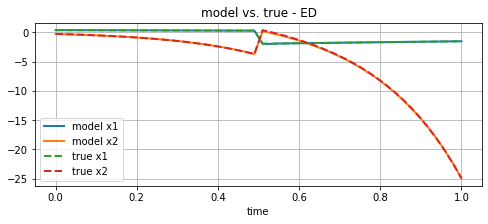

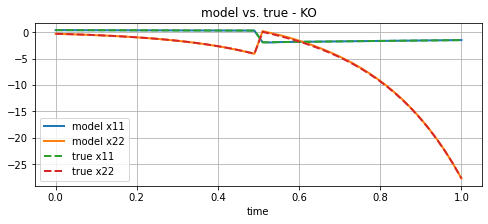

1


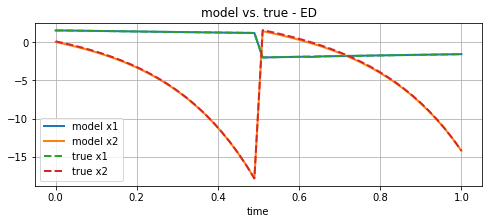

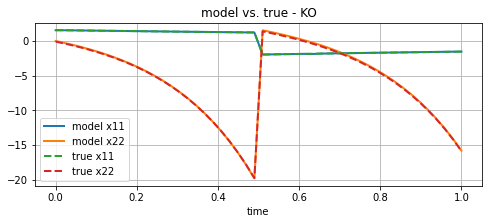

2


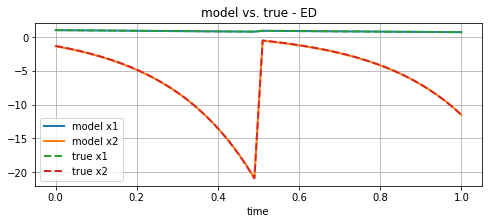

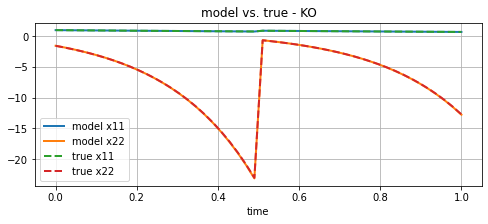

3


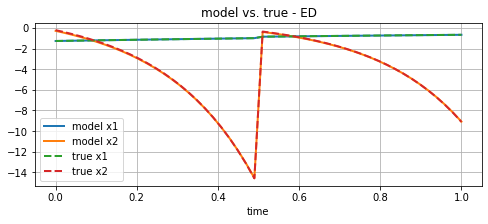

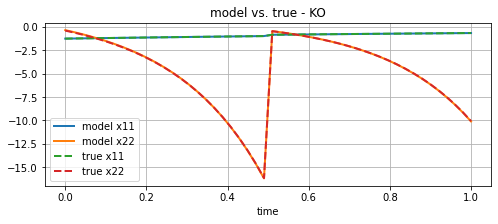

4


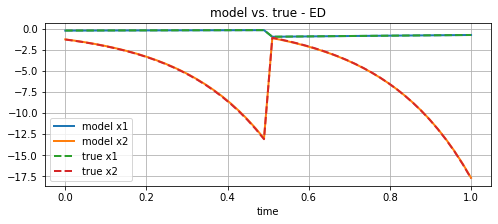

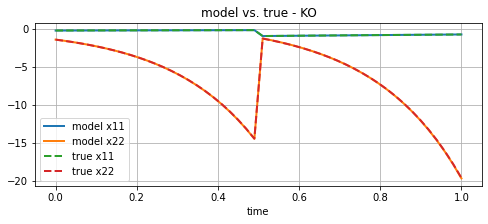

5


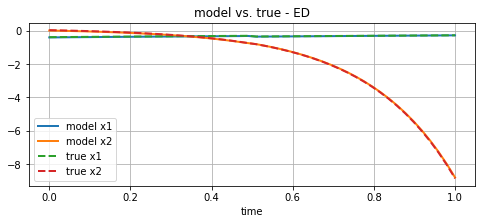

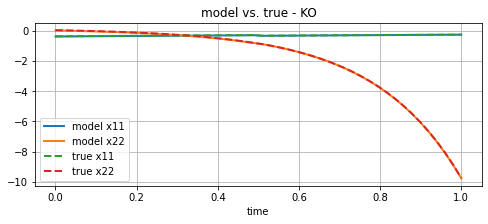

6


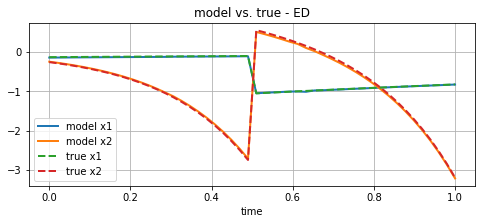

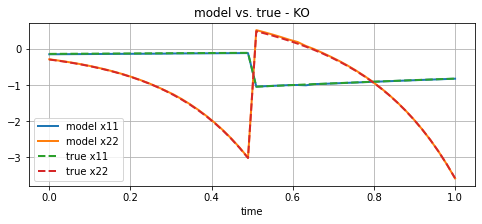

7


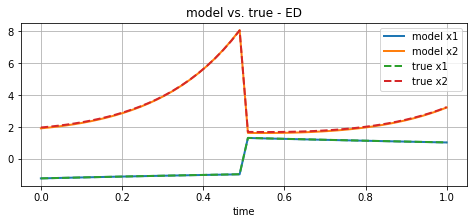

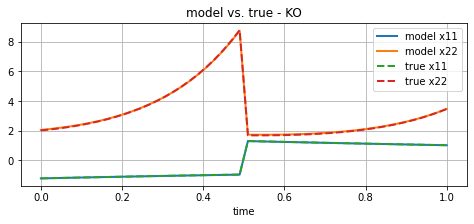

8


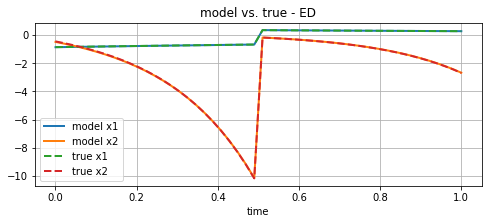

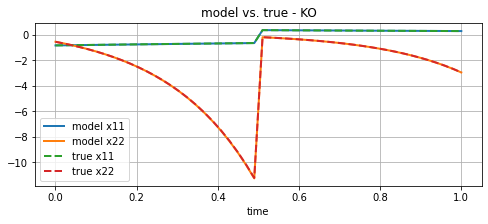

9


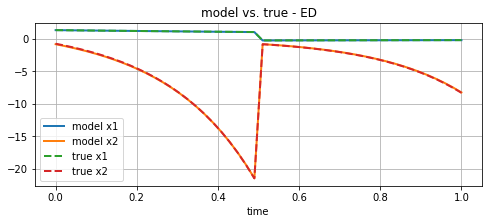

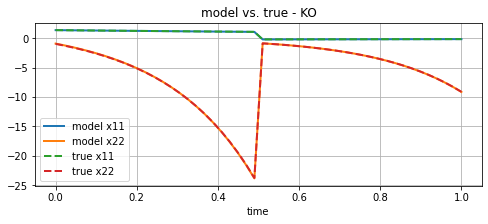

10


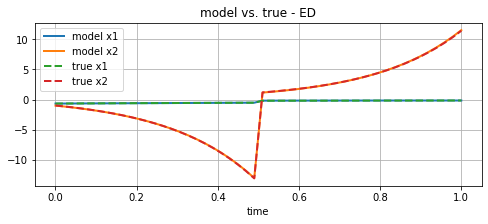

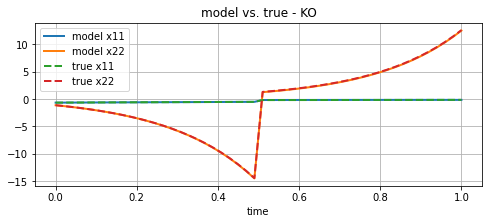

11


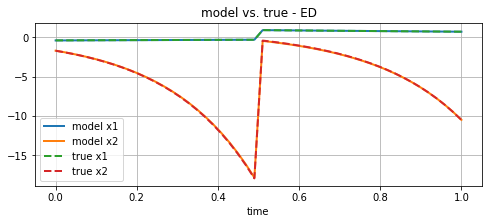

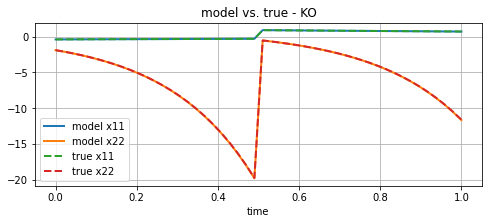

12


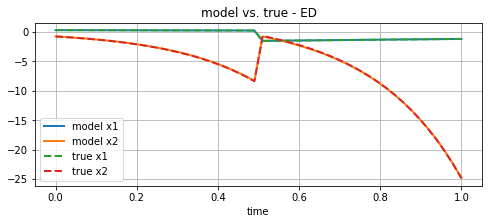

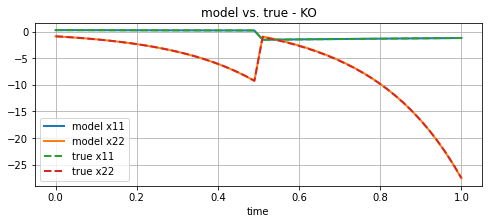

13


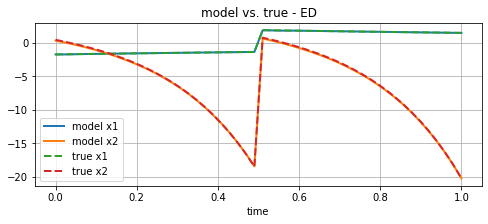

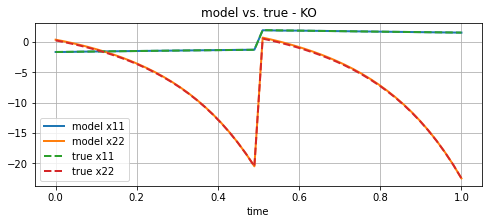

14


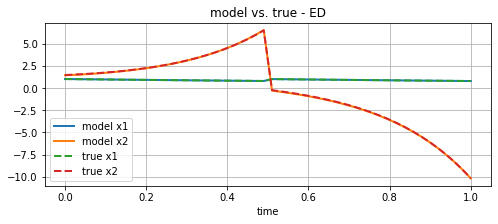

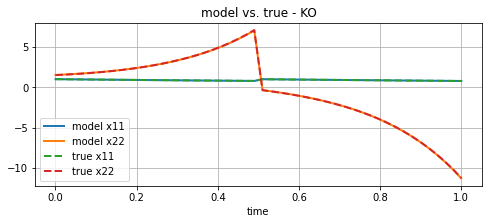

15


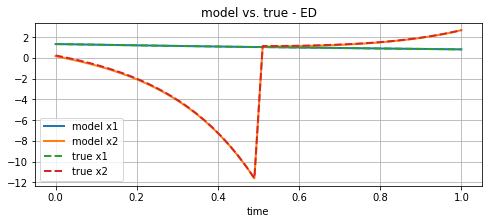

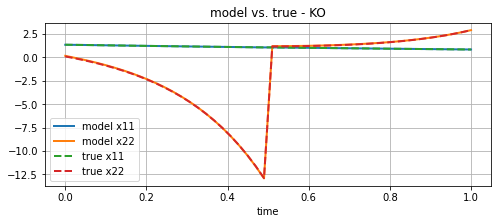

16


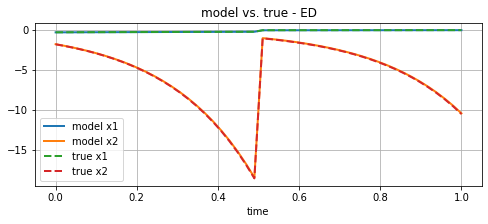

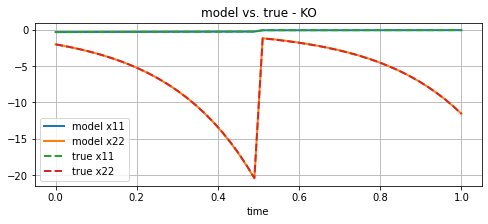

17


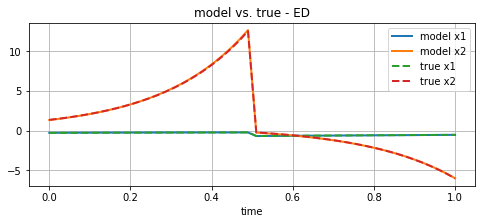

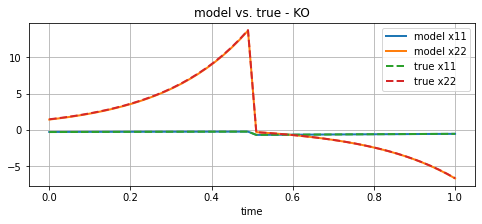

18


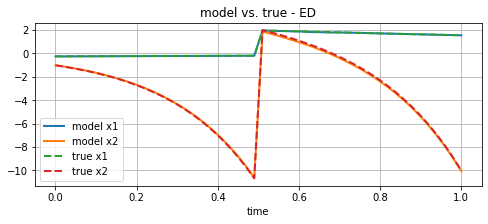

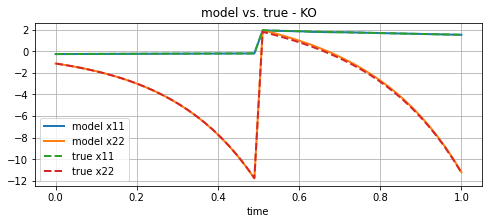

19


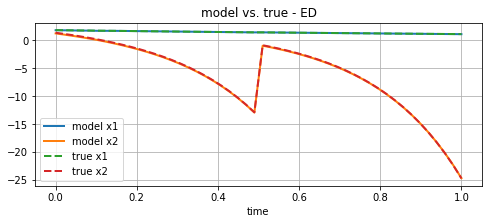

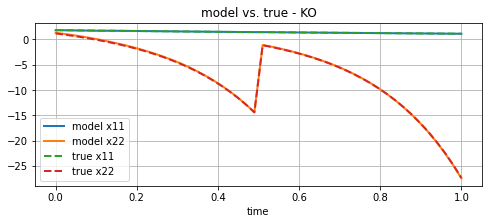

20


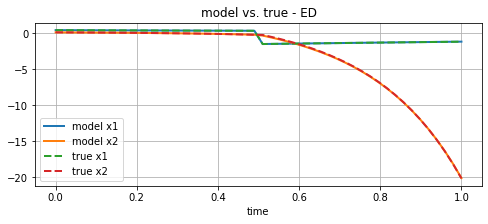

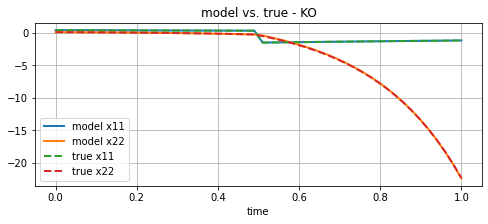

21


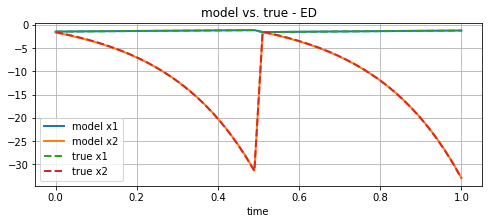

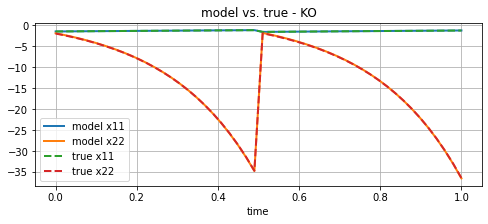

22


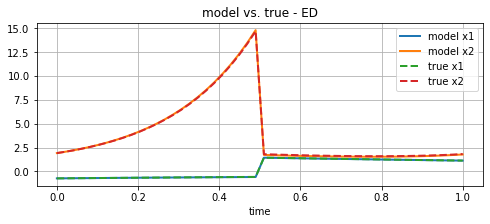

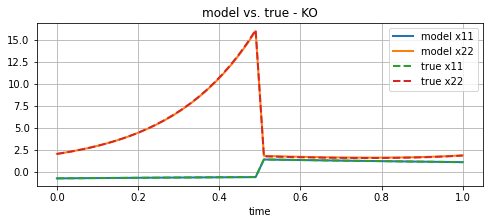

23


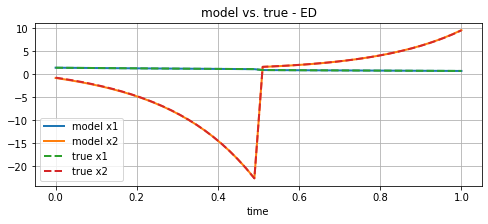

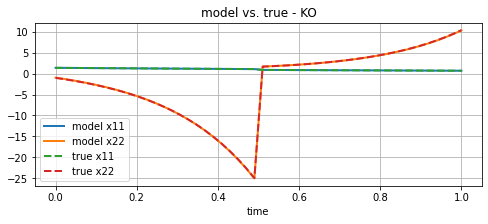

24


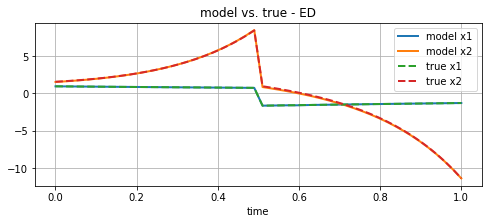

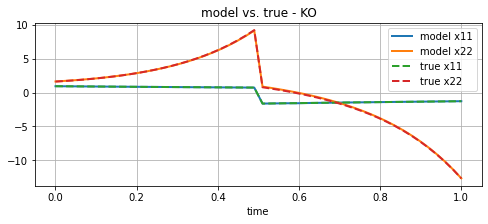

25


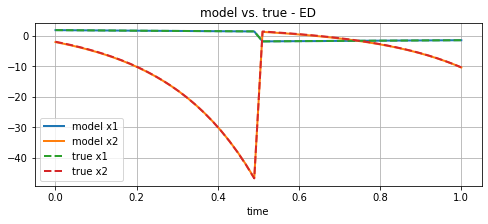

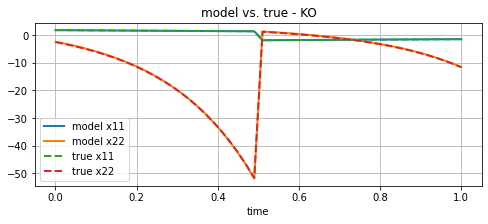

26


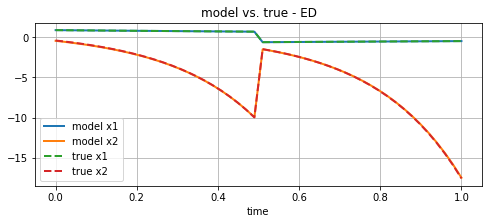

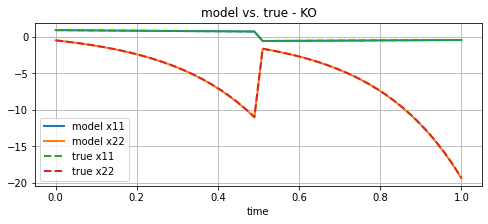

27


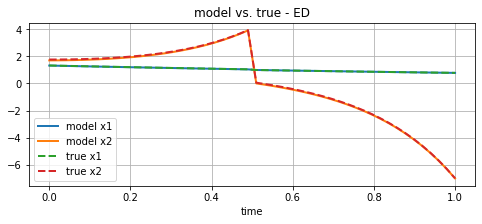

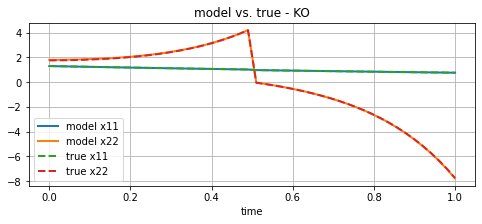

28


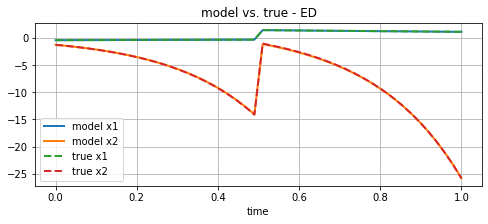

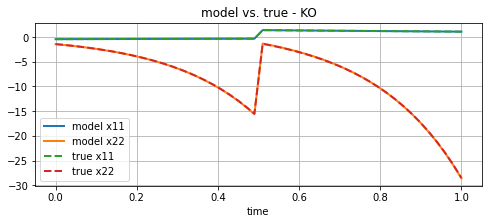

29


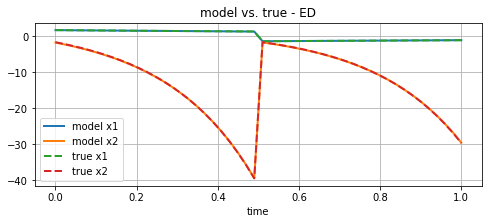

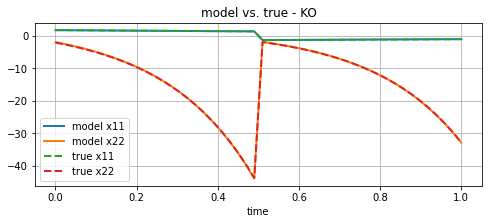

30


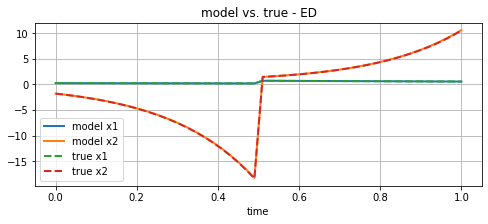

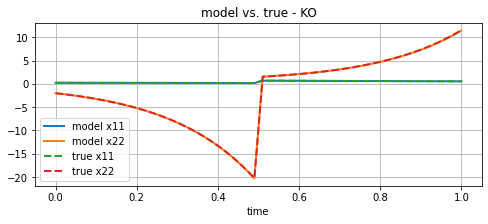

31


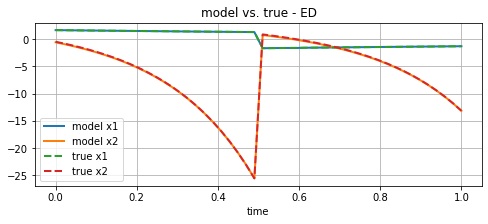

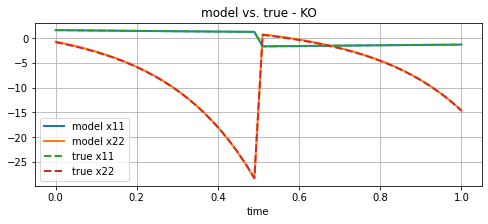

32


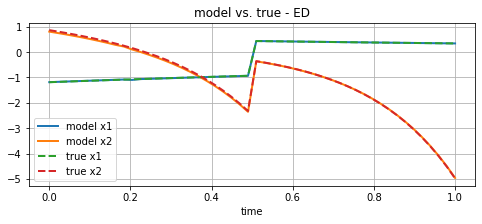

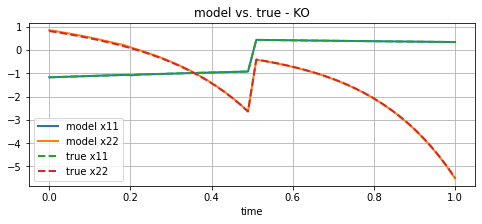

33


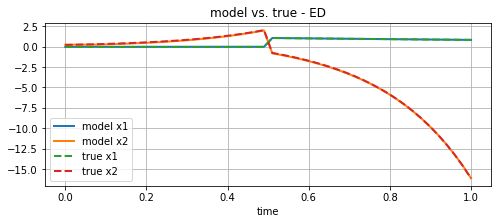

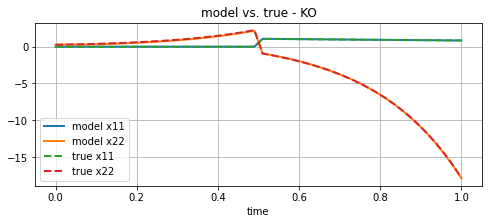

34


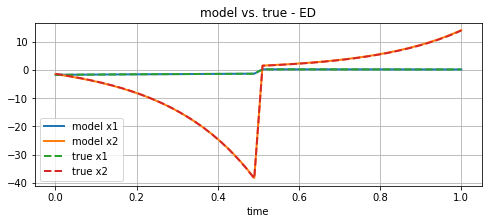

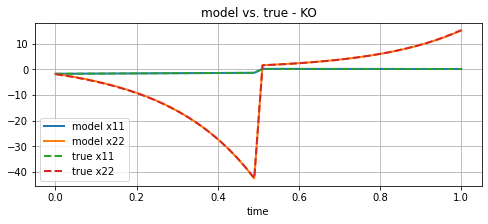

35


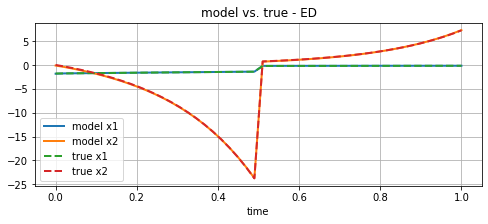

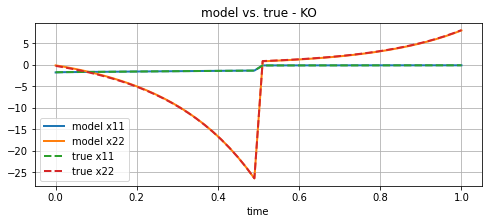

36


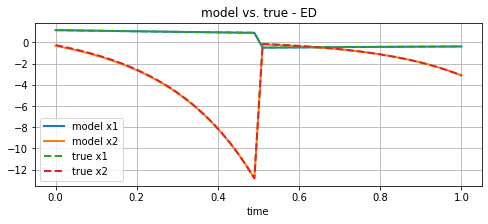

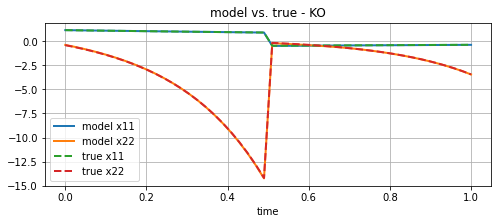

37


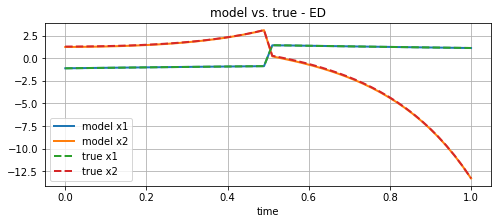

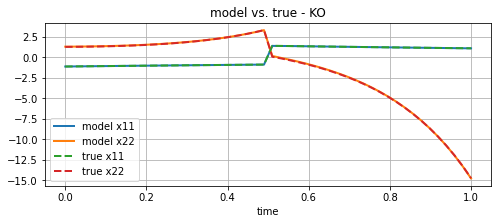

38


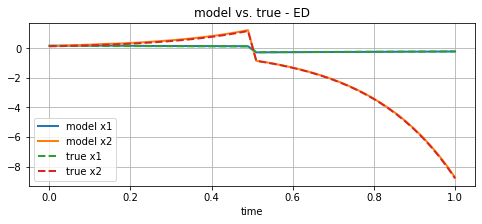

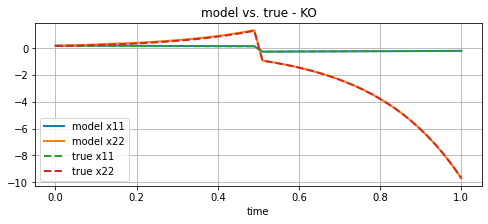

In [18]:
for n in range(39):
  t_space = np.linspace(0, 1, 50)
  print(n)
  plt.figure(figsize=(8,3))
  plt.plot(t_space, df_model.iloc[50*n:50*(n+1),0], '-', linewidth=2, label='model x1')
  plt.plot(t_space, df_model.iloc[50*n:50*(n+1),1], '-', linewidth=2, label='model x2')

  plt.plot(t_space, df_model.iloc[50*n:50*(n+1),4], '--', linewidth=2, label='true x1')
  plt.plot(t_space, df_model.iloc[50*n:50*(n+1),5], '--', linewidth=2, label='true x2')

  plt.title('model vs. true - ED')
  plt.xlabel('time')
  plt.legend()
  plt.grid()
  plt.show();

  plt.figure(figsize=(8,3))

  plt.plot(t_space, df_model.iloc[50*n:50*(n+1),2], '-', linewidth=2, label='model x11')
  plt.plot(t_space, df_model.iloc[50*n:50*(n+1),3], '-', linewidth=2, label='model x22')

  plt.plot(t_space, df_model.iloc[50*n:50*(n+1),6], '--', linewidth=2, label='true x11')
  plt.plot(t_space, df_model.iloc[50*n:50*(n+1),7], '--', linewidth=2, label='true x22')

  plt.title('model vs. true - KO')
  plt.xlabel('time')
  plt.legend()
  plt.grid()
  plt.show();



In [ ]:
# names = [weight.name for layer in model.layers for weight in layer.weights]
# weights = model.get_weights()

# for name, weight in zip(names, weights):
#     print(name, weight.shape)
#     print(name, weight)

In [ ]:
# https://towardsdatascience.com/step-by-step-understanding-lstm-autoencoder-layers-ffab055b6352

In [ ]:
# # lstm autoencoder to recreate a timeseries
# import numpy as np
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense
# from keras.layers import RepeatVector
# from keras.layers import TimeDistributed

# from keras.utils.vis_utils import plot_model
# import tensorflow as tf
# from numpy import linalg as LA

# '''
# A UDF to convert input data into 3-D
# array as required for LSTM network.
# '''

# def temporalize(X, y, lookback):
#     output_X = []
#     output_y = []
#     for i in range(len(X)-lookback-1):
#         t = []
#         for j in range(1,lookback+1):
#             # Gather past records upto the lookback period
#             t.append(X[[(i+j+1)], :])
#         output_X.append(t)
#         output_y.append(y[i+lookback+1])
#     return output_X, output_y

In [ ]:
# # define input timeseries
# timeseries = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
#                        [0.1**3, 0.2**3, 0.3**3, 0.4**3, 0.5**3, 0.6**3, 0.7**3, 0.8**3, 0.9**3]]).transpose()

# timesteps = timeseries.shape[0]
# n_features = timeseries.shape[1]
# timeseries

In [ ]:
# len(timeseries)

In [ ]:
# timesteps = 3
# X, y = temporalize(X = timeseries, y = np.zeros(len(timeseries)), lookback = timesteps)

# n_features = 2
# X = np.array(X)
# X = X.reshape(X.shape[0], timesteps, n_features)

# print(X, y)

In [ ]:
# len(y)

In [ ]:
# type(X)

In [ ]:
# define model
# model = Sequential()
# model.add(LSTM(128, activation='relu', input_shape=(timesteps,n_features), return_sequences=True))
# model.add(LSTM(64, activation='relu', return_sequences=False))
# model.add(RepeatVector(timesteps))
# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(LSTM(128, activation='relu', return_sequences=True))
# model.add(TimeDistributed(Dense(n_features)))
# model.compile(optimizer='adam', loss='mse')
# model.summary()
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# # fit model
# model.fit(X, X, epochs=300, batch_size=5, verbose=0)
# # demonstrate reconstruction
# yhat = model.predict(X, verbose=0)
# print('---Predicted---')
# print(np.round(yhat,3))
# print('---Actual---')
# print(np.round(X, 3))

In [ ]:
import tensorflow as tf
import numpy as np
xs = tf.Variable(np.array([[1, 2],[3, 4]]), dtype = tf.float32)
l1 = tf.norm(xs, axis = None)
print(l1)

tf.Tensor(5.477226, shape=(), dtype=float32)
